In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import tweepy 

### Gathering the datasets

#### 1) Twitter archive from csv file data import

In [2]:
#loading the csv archive file
archive_df = pd.read_csv('data/twitter-archive-enhanced.csv')

In [3]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2) Dog breed images url data import

In [4]:
# this is likely a tab-seperated file
req = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# checking encoding and separation
req.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [5]:
file = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
images_df = pd.read_csv(file, sep='\t')

In [7]:
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# create a csv file
images_df.to_csv('data/images_prediction.csv')

#### 3) Twitter API data import

In [9]:
# actual keys are removed
consumer_key = '27BDBZRT2YH0OsClxxxx'
consumer_secret = '0CTUeZXfSIIPsrUpMQUammkX9GD5YaOe18xmkcBoRjxxxx'
access_token = '1036981266573406209-vkGSNkimQDyNBEVTk2onkGWwhxxxx'
access_secret = 'IVoohbJJ8RZ0QWoWEu9zHsRc5P8dRbK9QycNGr2xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# tweet ID list to iterate through from twitter archive file
tweet_list = archive_df['tweet_id']

In [ ]:
# check
tweet_list[0:10]

In [ ]:
# create and write to JSON file, line by line
# exceptions list
exceptions = []

# opening and writing to JSON file
with open('tweet_json.txt', 'w', encoding = 'utf-8') as f:
    for tweet_id in tweet_list:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
        # writing content with new paragraphs
            f.write('\n')
        except Exception as e:
            exceptions.append(tweet_id)
        #print out message
            print(str(e))

In [9]:
dfj = pd.read_json('data/tweet_json.txt', orient='records', lines=True)

In [10]:
# look to extract specific columns from the imported data
dfj.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38444,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8456,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32939,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6230,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24815,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4129,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41797,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8586,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39961,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9316,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [11]:
# I'll began with extracting these columns to assess 
tweet_df = dfj[['id', 'favorite_count', 'retweet_count', 'retweeted','full_text','source', 'created_at']]

In [12]:
tweet_df.head()

,id,favorite_count,retweet_count,retweeted,full_text,source,created_at
0,892420643555336193,38444,8456,False,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 16:23:56
1,892177421306343426,32939,6230,False,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 00:17:27
2,891815181378084864,24815,4129,False,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-31 00:18:03
3,891689557279858688,41797,8586,False,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-30 15:58:51
4,891327558926688256,39961,9316,False,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-29 16:00:24


In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 7 columns):
id                2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
retweeted         2342 non-null bool
full_text         2342 non-null object
source            2342 non-null object
created_at        2342 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(3), object(2)
memory usage: 112.1+ KB


In [14]:
tweet_df.to_csv('tweetAPI.csv')

### Assess

The three extracted datasets have a common column in "tweet_id" (or "id" in the api pull). In database terms, we look to the tweet IDs as the key that relates the data together. We aim to find something interesting across the datasets to consolidate them into a single dataset.  In order to tidy the data, we will look at each dataframe individually to indentify errors, missing values, and columns/variables that we will decide not to use for our consolidated dataset. 

In [15]:
# before beginning we create copies for cleaning
archive_dfc = archive_df.copy()
image_dfc = images_df.copy()
api_dfc  = tweet_df.copy()

### Visual Inspection

#### 1) Twitter archived dataframe

In [16]:
archive_dfc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


There is a bit of missing data in the five columns ("in_reply_to_status_id", "in_reply_to_user_id", "retweeted_id", "retweeted_status_id", "retweeted_status_timestamp"). We'll assess programmatically if we can fix these issues, or decide to remove the column entirely.

In [17]:
# looking for unique values within columns that may lead to highlighting specific columns/variables
columns = ['tweet_id','source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo']

for col in columns:
    print('Unique value counts for', str(col), ':','\n',  len(archive_dfc[col].unique()))
    print('Unique values for', str(col), ':','\n',  archive_dfc[col].unique())
    print('----------------------------------------------------------------')

Unique value counts for tweet_id : 
 2356
Unique values for tweet_id : 
 [892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]
----------------------------------------------------------------
Unique value counts for source : 
 4
Unique values for source : 
 ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
----------------------------------------------------------------
Unique value counts for text : 
 2356
Unique values for text : 
 ["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, t

#### 2) Dog breed images dataframe

In [18]:
image_dfc

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Upon first glance, I see that the Prediciton scores (p1, p2, p3 columns) need to be condensed in some manner. However, we need to be mindful of picking the prediction column with a "True" outcome in identifying
a dog. Also, the dog breed names need to be formatted. We currently have some with all lower case letters, some with underscores linking the names (though we'll have to check if there's reason for that). In addition, I need to see why the image column displays more than 1 at times. 

#### 3) Twitter API dataframe

In [19]:
api_dfc

,id,favorite_count,retweet_count,retweeted,full_text,source,created_at
0,892420643555336193,38444,8456,False,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 16:23:56
1,892177421306343426,32939,6230,False,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 00:17:27
2,891815181378084864,24815,4129,False,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-31 00:18:03
3,891689557279858688,41797,8586,False,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-30 15:58:51
4,891327558926688256,39961,9316,False,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-29 16:00:24
5,891087950875897856,20057,3087,False,Here we have a majestic great white breaching ...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-29 00:08:17
6,890971913173991426,11740,2053,False,Meet Jax. He enjoys ice cream so much he gets ...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-28 16:27:12
7,890729181411237888,64910,18767,False,When you watch your owner call another dog a g...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-28 00:22:40
8,890609185150312448,27574,4238,False,This is Zoey. She doesn't want to be one of th...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-27 16:25:51
9,890240255349198849,31646,7346,False,This is Cassie. She is a college pup. Studying...,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-26 15:59:51


Looking at the retweeted columns seemingly looks like all these posts are original content, and not retweets. I'll take a look at the 
source column and see if that is something worth keeping. 

Just a note to say that in addition to visually inspecting these dataframes in the notebook, I also opened them in Excel to have a more careful look. 

### Programmatic Assessment

Use of pandas/numpy to assess the three datasets in order consolidate into a single tidy dataset. 

#### a) Twitter archive data

In [20]:
archive_dfc.info()
archive_dfc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Looking at the shape of the dataset, we see that the 5 columns we questioned earlier are indeed missing quite a bit from the dataset. Where the entire dataset has 2356 observations, the reply_to and retweeted columns are counted 78 and 181 times respectively. Other findings in the are that the "timestamp" is a non-null datatype, so we may consider changing that to a datetime format. Also since we are trying to compare tweet_id's across the 3 datasets, we also need to be sure that the datatypes for that column match. Lastly, the 4 columns describing the stage of the dog needs to be consolidated into a single column. 

In [21]:
# checking the values in the columns with missing data
columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp']

for col in columns:
    print('Unique value counts for', str(col), ':','\n',  len(archive_df[col].unique()))
    print('Unique values for', str(col), ':','\n',  archive_df[col].value_counts())
    print('----------------------------------------------------------------')

Unique value counts for in_reply_to_status_id : 
 78
Unique values for in_reply_to_status_id : 
 6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.7

Judging from the output, these columns are missing data that is simply not obtainable from the available resources. The other datasets do not contain these values. Also, the nature of the data for these columns 
may not be needed as 3 of the 5 columns involuve retweet status, when we are interested  in original content. Thus, we look  to remove these columns. Judging from the output, these columns are missing data that is simply not obtainable from the available resources. The other datasets do not contain these values. Also, the nature of the data for these columns 
may not be needed as 3 of the 5 columns involuve retweet status, when we are interested  in original content. Thus, we look  to remove these columns. 

In [22]:
# check name column for consistant formatting and quantifying 'None'
archive_dfc['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
an              7
Bailey          7
Buddy           7
Daisy           7
Toby            7
Rusty           6
Bella           6
Koda            6
Scout           6
Jack            6
Leo             6
Milo            6
Oscar           6
Dave            6
Jax             6
Stanley         6
Finn            5
             ... 
Dutch           1
Shiloh          1
Harnold         1
Sweet           1
Kial            1
Tanner          1
Ben             1
Geoff           1
Zeek            1
Dobby           1
Jett            1
Pluto           1
Bubba           1
Poppy           1
Kingsley        1
Maya            1
Brooks          1
Monty           1
Chubbs          1
Iggy            1
incredibly      1
Luther          1
Coopson         1
Combo           1
Dylan     

Looks like the name column is the victim of empty ("none") and lazy ("a", "the", "an") inputs. We may be able to use the "Text" column to use as a reference and fill in some names if available.

In [23]:
# looking for duplicates within the tweet_id
archive_dfc['tweet_id'].duplicated().sum()

0

#### b) Dog breed images

In [24]:
image_dfc.info()
image_dfc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Looking at the structure of the data, we see that a nice tidy set. Each observation has data present in each column. The dataset seems to be devoid of missing values. We'll want to check for quality issues here as the names of the dog breeds seem to come up in different formats. Also, we may want to check for duplicate tweet_id as as some of the images numbers seem to vary from 1 to greater than 1. 

In [25]:
# looking for duplicates within tweet_id
image_dfc['tweet_id'].duplicated().sum()

0

In [26]:
# how many observations are NOT dogs
# we can tell by looking the px_dog columns which are FALSE. Thus if we get 3 False, then the observation is not a dog.
image_dfc.groupby(['p1_dog', 'p2_dog', 'p3_dog']).count()

tweet_id  jpg_url  img_num    p1  p1_conf    p2  \
p1_dog p2_dog p3_dog                                                    
False  False  False        324      324      324   324      324   324   
              True          64       64       64    64       64    64   
       True   False         54       54       54    54       54    54   
              True         101      101      101   101      101   101   
True   False  False         43       43       43    43       43    43   
              True          91       91       91    91       91    91   
       True   False        155      155      155   155      155   155   
              True        1243     1243     1243  1243     1243  1243   

                      p2_conf    p3  p3_conf  
p1_dog p2_dog p3_dog                          
False  False  False       324   324      324  
              True         64    64       64  
       True   False        54    54       54  
              True        101   101      101  
True   False  False        43    43       43  
              True         91    91       91  
       True   False       155   155      155  
              True       1243  1243     1243

We see that 324 observations are NOT dogs according to the p_dog columns. We look to isolate the tweet_ids associated with the non-dog outcomes. 

In [27]:
# create dataframe of non-dog observations
non_dog_df = image_dfc.loc[(image_dfc['p1_dog'] == False) & (image_dfc['p2_dog'] == False) & (image_dfc['p3_dog'] == False)]

# are any of the non-dog tweet_ids duplicates
non_dog_df['tweet_id'].duplicated().sum()

0

#### c) Twitter API data

In [28]:
api_dfc.info()
api_dfc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 7 columns):
id                2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
retweeted         2342 non-null bool
full_text         2342 non-null object
source            2342 non-null object
created_at        2342 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(3), object(2)
memory usage: 112.1+ KB


,id,favorite_count,retweet_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422646e+17,8033.073015,2975.887703
std,6.837466e+16,12365.760748,4986.690694
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,1390.250000,598.000000
50%,7.186224e+17,3504.500000,1391.500000
75%,7.987010e+17,9870.750000,3474.000000
max,8.924206e+17,164336.000000,84547.000000


The extracted columns from the twitter api data doesn't contain any missing data. However, we need to assess if any values are duplicated and unique. Also we want to rename the "id" column to "tweet_id" to match the other datasetsThe extracted columns from the twitter api data doesn't contain any missing data. However, we need to assess if any values are duplicated and unique. Also we want to rename the "id" column to "tweet_id" to match the other datasets

In [29]:
# checking for duplicates within the id column
api_dfc['id'].duplicated().sum()

0

In [30]:
# checking values for the "retweeted", "source" columns
columns=['retweeted', 'source']

for col in columns:
    print('Unique value counts for', str(col), ':','\n',  len(api_dfc[col].unique()))
    print('Unique values for', str(col), ':','\n',  api_dfc[col].value_counts())
    print('----------------------------------------------------------------')

Unique value counts for retweeted : 
 1
Unique values for retweeted : 
 False    2342
Name: retweeted, dtype: int64
----------------------------------------------------------------
Unique value counts for source : 
 4
Unique values for source : 
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2207
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64
----------------------------------------------------------------


Looking at the values for retweeted and source columns, we see that retweeted status is all False, meaning these are all original tweets. The source value being 4 shows the vast majority of people posting are doing so from their iPhone app. 

In [31]:
# checking the source column to compare with the source column in the twitterAPI dataset
print('Twitter Archive Source Column: ', '\n', archive_df['source'].value_counts())
print('------------------------------------------')
print('API Source Column: ', '\n', archive_df['source'].value_counts())

Twitter Archive Source Column:  
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64
------------------------------------------
API Source Column:  
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64


### Assessment Summary


#### a) Twitter Archive dataset

    1) Change datatypes for timestamp and tweet_id
    2) Remove any retweeted columns
    3) Consolidate dog stages into a single column (tidyness)
    4) Clean up the 'Names' column 
    5) Clean up faulty and missing ratings 



#### b) Dog breed images dataset

    1) Change tweet_id datatype
    2) Consolidate the prediction columns to a single (tidyness)
    3) Remove underscore from prediction values
    4) Capitalize first letter of prediction values 



#### c) Twitter API dataset

    1) Rename "id" to "tweet_id"
    2) Change datatypes for "tweet_id" and timestamp
    3) Remove "retweeted" column 



##### d) Merged/Master dataset

    1) Compare/Remove duplicated columns due to merge (source, timestamp, text)
    2) Rename columns for readability
    3) Reorder column headers for readability
    4) Create a "rating_per_dog" column to "normalize" the ratings scores (tidyness)
    5) Check for null values 


## Cleaning

### Tweet Archive File cleaning

In [3]:
# load in the csv file for cleaning
archive_df = pd.read_csv('data/twitter-archive-enhanced.csv')
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

1) DEFINE: Change the datatype for 'tweet_id' and 'timestamp" columns

In [5]:
# 1) CODE:
archive_df['tweet_id'] = archive_df['tweet_id'].astype(str)
archive_df['timestamp'] = pd.to_datetime(archive_df['timestamp'])

# 1) test
print('tweet_id: ',type(archive_df['tweet_id'].iloc[0]))
print('------------------------------------------------')
print('timestamp: ',type(archive_df['timestamp'].iloc[0]))

tweet_id:  <class 'str'>
------------------------------------------------
timestamp:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


2) DEFINE: Remove any columns that are "retweeted" and "in_reply_to"

In [6]:
# 2) CODE
drop_col = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp']

archive_df.drop(drop_col, axis= 1, inplace = True)

# 2) Test
print(archive_df.columns)
print('-----------------')
archive_df.info()

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


3) DEFINE: Want to consolidate the dog stages into a single column for later analysis

In [7]:
# 3) Consolidate the dog stages into a single column
archive_df['stage'] = archive_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis=1)

archive_df['stage'].replace('NoneNoneNoneNone', 'None', inplace=True)
archive_df['stage'].replace('doggoNoneNoneNone', 'doggo', inplace=True)
archive_df['stage'].replace('NoneflooferNoneNone', 'floofer', inplace=True)
archive_df['stage'].replace('NoneNonepupperNone', 'pupper', inplace=True)
archive_df['stage'].replace('NoneNoneNonepuppo', 'puppo', inplace=True)

In [8]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
stage                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 239.4+ KB


In [9]:
# now remove 'doggo', 'floofer', 'pupper', 'puppo'
drop_stage = ['doggo', 'floofer', 'pupper', 'puppo']

archive_df.drop(columns=drop_stage, inplace=True)

In [10]:
archive_df.info()
print('------------------------------------')
print('Dog Stage value counts')
archive_df['stage'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 165.7+ KB
------------------------------------
Dog Stage value counts


None                    1976
pupper                   245
doggo                     83
puppo                     29
doggoNonepupperNone       12
floofer                    9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

We see that 14 rows actually had multiple inputs in the stage columns. We're going to replace these entries with the term "multiple". 

In [11]:
archive_df['stage'].replace('doggoNonepupperNone', 'multiple', inplace=True)
archive_df['stage'].replace('doggoNoneNonepuppo', 'multiple', inplace=True)
archive_df['stage'].replace('doggoflooferNoneNone', 'multiple', inplace=True)

In [12]:
# test if "multiple" was input correctly
archive_df['stage'].value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: stage, dtype: int64

4) DEFINE: Clean up the "Names" column

In [13]:
# CODE: First create a list of lowercase names
# convert 'name column to a list
names = archive_df['name'].tolist()
names

# initialize 2 lists
lowercase_names = []
uppercase_names = []

for name in names:
    if name[0].isupper() == False:
        lowercase_names.append(name)
    else: 
        uppercase_names.append(name)

# lower case names are NOT actual names
lowercase_names

# find unique values
uniques = set(lowercase_names)
uniques

# now we have a list of values we can remove from the Names column
newlist = list(uniques)

In [14]:
# now we can replace the non-names in Name column
for low in newlist:
    archive_df['name'].replace(str(low), 'None', inplace=True)

In [15]:
# test
archive_df['name'].value_counts()[0:25]

None       854
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Sadie        8
Bailey       7
Buddy        7
Daisy        7
Toby         7
Milo         6
Jack         6
Bella        6
Scout        6
Jax          6
Dave         6
Koda         6
Leo          6
Rusty        6
Oscar        6
Name: name, dtype: int64

Now we have more "None" values, but effectively removed any non-names from the list.

In [16]:
# final check 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 165.7+ KB


5) DEFINE: Clean up missing and faulty ratings

In [18]:
# change datatypes for "numerator" and "denominator" to float
archive_df['rating_numerator'] = archive_df['rating_numerator'].astype(float)
archive_df['rating_denominator'] = archive_df['rating_denominator'].astype(float)

# check
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
stage                 2356 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 165.7+ KB


In [29]:
# check for any null values 
print('rating numerator null values: ','\n' ,archive_df['rating_numerator'].isnull().value_counts())
print('--------------------------')
print('rating denominator null values: ','\n',archive_df['rating_denominator'].isnull().value_counts())

rating numerator null values:  
 False    2356
Name: rating_numerator, dtype: int64
--------------------------
rating denominator null values:  
 False    2356
Name: rating_denominator, dtype: int64


Aiming to scan the text field for any decimal values to be added to a list. From that list, we will locate the tweet_id's and replace the initial rating_numerator in the dataframe. 

In [47]:
# save values into dataframe where text contains decimals
bad_numerator_df = archive_df[archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]

# creating a list to append the extracted values
numerator = []

for item in  bad_numerator_df['text']:
    splitted = item.split('/')
    numerator.append(splitted[0].split()[-1])
print(numerator)

['13.5', '9.75', '9.75', '11.27', '9.5', '11.26']


C:\Users\willt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [48]:
# save the corresponding tweet_ids into a list
tweet_id_list = bad_numerator_df['tweet_id'].tolist()

for i in range(len(tweet_id_list)):
    # change the numerator in the initial dataframe
    archive_df.loc[(archive_df['tweet_id'] == tweet_id_list[i]), ['rating_numerator']] = numerator[i]
    # test: print out the changed values in the original daraframe
    print(archive_df.loc[(archive_df['tweet_id'] == tweet_id_list[i]), ['rating_numerator']])

   rating_numerator
45             13.5
    rating_numerator
340             9.75
    rating_numerator
695             9.75
    rating_numerator
763            11.27
     rating_numerator
1689              9.5
     rating_numerator
1712            11.26


In [55]:
# checking the text to confirm extracted ratings
print(archive_df['text'][45])
print(archive_df['text'][340])
print(archive_df['text'][695])
print(archive_df['text'][763])
print(archive_df['text'][1689])
print(archive_df['text'][1712])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [56]:
# test to confirm if the ratings numerators for these rows weere changed
print(archive_df['rating_numerator'][45])
print(archive_df['rating_numerator'][340])
print(archive_df['rating_numerator'][695])
print(archive_df['rating_numerator'][763])
print(archive_df['rating_numerator'][1689])
print(archive_df['rating_numerator'][1712])

13.5
9.75
9.75
11.27
9.5
11.26


### Dog Breed Images file cleaning

In [57]:
# load in csv file
image_df = pd.read_csv('data/images_prediction.csv', index_col=0)
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


1) DEFINE: Change the datatype for tweet_id

In [58]:
# 1) CODE:
image_df['tweet_id'] = image_df['tweet_id'].astype(str)

# 1) Test
print(type(image_df['tweet_id'].iloc[0]))

<class 'str'>


2) DEFINE: Conslidate the p1, p2, p3 prediction and confidence columns

In [59]:
# 2) CODE: 
dog_breed = []
conf_score = []

# create if/else statement to capture the "true" results
def prediction(image_df):
    if image_df['p1_dog'] == True:
        dog_breed.append(image_df['p1'])
        conf_score.append(image_df['p1_conf'])
    elif image_df['p2_dog'] == True:
        dog_breed.append(image_df['p2'])
        conf_score.append(image_df['p2_conf'])
    elif image_df['p3_dog'] == True:
        dog_breed.append(image_df['p3'])
        conf_score.append(image_df['p3_conf'])
    else:
        dog_breed.append('Error')
        conf_score.append('Error')
        
image_df.apply(prediction, axis=1)

image_df['dog_breed'] = dog_breed
image_df['conf_score'] =  conf_score

# 2) TEST
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dog_breed     2075 non-null object
conf_score    2075 non-null object
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 200.6+ KB


In [60]:
# drop any rows where dog_breed  = 'Error'
image_df = image_df[image_df['dog_breed'] != 'Error']

# TEST
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id      1751 non-null object
jpg_url       1751 non-null object
img_num       1751 non-null int64
p1            1751 non-null object
p1_conf       1751 non-null float64
p1_dog        1751 non-null bool
p2            1751 non-null object
p2_conf       1751 non-null float64
p2_dog        1751 non-null bool
p3            1751 non-null object
p3_conf       1751 non-null float64
p3_dog        1751 non-null bool
dog_breed     1751 non-null object
conf_score    1751 non-null object
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


3) DEFINE: Remove the extraneous prediction columns

In [61]:
# 3) CODE:
drop_col = ['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

image_df = image_df.drop(columns=drop_col, axis=1)

# 3) TEST:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1751 non-null object
jpg_url       1751 non-null object
img_num       1751 non-null int64
dog_breed     1751 non-null object
conf_score    1751 non-null object
dtypes: int64(1), object(4)
memory usage: 82.1+ KB


4) Remove the underscores from the values in dog_breed column

In [62]:
# 4) CODE:
image_df['dog_breed'] = image_df['dog_breed'].str.replace('_', ' ')

# 4) TEST:
image_df['dog_breed'][0:10]

0     Welsh springer spaniel
1                    redbone
2            German shepherd
3        Rhodesian ridgeback
4         miniature pinscher
5       Bernese mountain dog
7                       chow
8           golden retriever
9           miniature poodle
10          golden retriever
Name: dog_breed, dtype: object

5) Capitalize the first letter of each value in prediction column

In [63]:
# 5) CODE:
image_df['dog_breed'] = image_df['dog_breed'].str.title()

# 5) TEST:
image_df['dog_breed'][0:10]

0     Welsh Springer Spaniel
1                    Redbone
2            German Shepherd
3        Rhodesian Ridgeback
4         Miniature Pinscher
5       Bernese Mountain Dog
7                       Chow
8           Golden Retriever
9           Miniature Poodle
10          Golden Retriever
Name: dog_breed, dtype: object

In [64]:
# final check
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1751 non-null object
jpg_url       1751 non-null object
img_num       1751 non-null int64
dog_breed     1751 non-null object
conf_score    1751 non-null object
dtypes: int64(1), object(4)
memory usage: 82.1+ KB


### Twitter API file cleaning

In [67]:
# load csv file
api_df = pd.read_csv('data/tweetAPI.csv', index_col=0)
api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 7 columns):
id                2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
retweeted         2342 non-null bool
full_text         2342 non-null object
source            2342 non-null object
created_at        2342 non-null object
dtypes: bool(1), int64(3), object(3)
memory usage: 130.4+ KB


1) Rename the "id" , "created_at" and "full_text" columns

In [68]:
# 1) CODE: 
api_df.rename(columns={'id': 'tweet_id', 'created_at': 'timestamp', 'full_text': 'text'}, inplace=True)

# 1) TEST:
api_df.columns

Index(['tweet_id', 'favorite_count', 'retweet_count', 'retweeted', 'text',
       'source', 'timestamp'],
      dtype='object')

2) DEFINE: Change the datatypes for "tweet_id" and "created_at" column

In [69]:
# 2) CODE:
api_df['timestamp'] = pd.to_datetime(api_df['timestamp'])
api_df['tweet_id'] = api_df['tweet_id'].astype(str)

# 2) TEST:
print('Datatype for "timestamp" column: ','\n', type(api_df['timestamp'].iloc[0]))
print('-----------------------------------------------------------')
print('Datateype for "tweet_id" column: ','\n',type(api_df['tweet_id'].iloc[0]))

Datatype for "timestamp" column:  
 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
-----------------------------------------------------------
Datateype for "tweet_id" column:  
 <class 'str'>


3) DEFINE: Remove the "retweet" column

In [70]:
# 3) CODE:
api_df.drop(columns='retweeted', inplace=True)

In [71]:
# 3) TEST:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 6 columns):
tweet_id          2342 non-null object
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
text              2342 non-null object
source            2342 non-null object
timestamp         2342 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 128.1+ KB


In [72]:
# final check
api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 6 columns):
tweet_id          2342 non-null object
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
text              2342 non-null object
source            2342 non-null object
timestamp         2342 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 128.1+ KB


## Merge to create master file

In [86]:
master_df = pd.merge(archive_df, api_df, on = 'tweet_id', how = 'inner')
master_df = pd.merge(master_df, image_df, on = 'tweet_id', how = 'inner')

master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 18 columns):
tweet_id              1745 non-null object
timestamp_x           1745 non-null datetime64[ns]
source_x              1745 non-null object
text_x                1745 non-null object
expanded_urls         1745 non-null object
rating_numerator      1745 non-null object
rating_denominator    1745 non-null float64
name                  1745 non-null object
stage                 1745 non-null object
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
text_y                1745 non-null object
source_y              1745 non-null object
timestamp_y           1745 non-null datetime64[ns]
jpg_url               1745 non-null object
img_num               1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(12)
memory usage: 259.0+ KB


In [87]:
# save to create a source master file to revert if needed
master_df.to_csv('data/Master.csv')

### Assess and Clean the Merged file

In [88]:
# load new dataframe to be able to reference source
merge_df = master_df
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 18 columns):
tweet_id              1745 non-null object
timestamp_x           1745 non-null datetime64[ns]
source_x              1745 non-null object
text_x                1745 non-null object
expanded_urls         1745 non-null object
rating_numerator      1745 non-null object
rating_denominator    1745 non-null float64
name                  1745 non-null object
stage                 1745 non-null object
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
text_y                1745 non-null object
source_y              1745 non-null object
timestamp_y           1745 non-null datetime64[ns]
jpg_url               1745 non-null object
img_num               1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(12)
memory usage: 259.0+ KB


1) DEFINE: Comapare and remove duplicate columns 

In [89]:
# programmatically inpsect
merge_df['same_timestamp'] = merge_df['timestamp_x'].equals(merge_df['timestamp_y'])
merge_df['same_source'] = merge_df['source_x'].equals(merge_df['source_y'])
merge_df['same_text'] = merge_df['text_x'].equals(merge_df['text_y'])

print('Same_Timestamp: ', '\n', merge_df['same_timestamp'].value_counts())
print('--------------------------------------------------')
print('Same_Source: ', '\n', merge_df['same_source'].value_counts())
print('--------------------------------------------------')
print('Same_Text:' , '\n', merge_df['same_text'].value_counts())

Same_Timestamp:  
 True    1745
Name: same_timestamp, dtype: int64
--------------------------------------------------
Same_Source:  
 True    1745
Name: same_source, dtype: int64
--------------------------------------------------
Same_Text: 
 True    1745
Name: same_text, dtype: int64


This returns that the 3 columns are equivalent, thus, I'll be removing one set of each

In [90]:
# remove the duplicate columns plus the columns comparing equivalence
col_to_drop = ['timestamp_y', 'source_y', 'text_y', 'same_timestamp', 'same_source', 'same_text']

merge_df.drop(columns=col_to_drop, inplace=True)

# check
merge_df.columns

Index(['tweet_id', 'timestamp_x', 'source_x', 'text_x', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'dog_breed',
       'conf_score'],
      dtype='object')

2) DEFINE: Rename columns that we kept

In [91]:
# 2) CODE: 
merge_df.rename(columns={'timestamp_x': 'timestamp', 'source_x': 'source', 'text_x': 'text'}, inplace=True)

# 2) TEST: 
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 15 columns):
tweet_id              1745 non-null object
timestamp             1745 non-null datetime64[ns]
source                1745 non-null object
text                  1745 non-null object
expanded_urls         1745 non-null object
rating_numerator      1745 non-null object
rating_denominator    1745 non-null float64
name                  1745 non-null object
stage                 1745 non-null object
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
jpg_url               1745 non-null object
img_num               1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(10)
memory usage: 218.1+ KB


3) DEFINE: Reassessing columns to determine if we need to remove them

In [92]:
# CODE: 
re_columns = ['expanded_urls', 'jpg_url', 'img_num', 'source']

for r in re_columns:
    print('Unique values for', str(r), ':', merge_df[r].nunique())
    print(merge_df[r].value_counts())
    print('-------------------------------------------------')

Unique values for expanded_urls : 1745
https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1    1
https://twitter.com/dog_rates/status/666094000022159362/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1    1
https://twitter.com/dog_rates/status/759197388317847553/photo/1,https://twitter.com/dog_rates/status/759197388317847553/photo/1,https://twitter.com/dog_rates/status/7591973883178

In [93]:
# 3) CODE: 
# decide to remove 'jpg_url', 'img_num', 'source'
dropcol = ['jpg_url', 'img_num', 'source']

merge_df = merge_df.drop(columns=dropcol, axis=1)

# 3) TEST
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 12 columns):
tweet_id              1745 non-null object
timestamp             1745 non-null datetime64[ns]
text                  1745 non-null object
expanded_urls         1745 non-null object
rating_numerator      1745 non-null object
rating_denominator    1745 non-null float64
name                  1745 non-null object
stage                 1745 non-null object
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 177.2+ KB


In [94]:
# 4) Reorder the columns to improve readibility, preferring "numerical" values toward the left of table, urls at right-side (end of table)
merge_df.columns
col_labels = ['tweet_id', 'timestamp', 'name', 'stage', 'text', 'rating_numerator','rating_denominator', 
              'favorite_count','retweet_count', 'dog_breed', 'conf_score','expanded_urls']


merge_df = merge_df.reindex(columns=col_labels)

# check
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 12 columns):
tweet_id              1745 non-null object
timestamp             1745 non-null datetime64[ns]
name                  1745 non-null object
stage                 1745 non-null object
text                  1745 non-null object
rating_numerator      1745 non-null object
rating_denominator    1745 non-null float64
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null object
expanded_urls         1745 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 177.2+ KB


5) DEFINE: Create a "rating_per_dog" column to "normalize" the ratings scores (tidyness). 

Assume that a denominator of 10 is equal to 1 dog, thus denominator of 30 may be equal to 3 dogs

In [97]:
# 5) CODE: 
# create a denonminator_per_dog column to reference
merge_df['den_per_dog'] = merge_df['rating_denominator'] /  10
merge_df.info()
merge_df['den_per_dog'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 13 columns):
tweet_id              1745 non-null object
timestamp             1745 non-null datetime64[ns]
name                  1745 non-null object
stage                 1745 non-null object
text                  1745 non-null object
rating_numerator      1745 non-null object
rating_denominator    1745 non-null float64
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null object
expanded_urls         1745 non-null object
den_per_dog           1745 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 190.9+ KB


count    1745.000000
mean        1.051633
std         0.682807
min         0.200000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: den_per_dog, dtype: float64

In [98]:
# change "rating_numerator" datatype to float
merge_df['rating_numerator'] = merge_df['rating_numerator'].astype(float)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 13 columns):
tweet_id              1745 non-null object
timestamp             1745 non-null datetime64[ns]
name                  1745 non-null object
stage                 1745 non-null object
text                  1745 non-null object
rating_numerator      1745 non-null float64
rating_denominator    1745 non-null float64
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null object
expanded_urls         1745 non-null object
den_per_dog           1745 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 190.9+ KB


While we see a few picture with many dogs, the majority of posts are comparing a single dog judging by the mean being 1.05.

In [99]:
# rating_per_dog = 'rating_numerator' / 'den_per_dog'
# since the numerator makes up the sum of ratings (i.e., a picture with 3 dogs may have a sum of 30-36),
# dividing by the den_per_dog should yield a suggested single rating per dog
merge_df['rating_per_dog'] = merge_df['rating_numerator'] / merge_df['den_per_dog']
print(merge_df['rating_per_dog'].describe())

print('------------------------------------')
print('The mean rating per dog is:', merge_df['rating_per_dog'].mean())
print('The old rating:' , merge_df['rating_numerator'].mean())

count    1745.000000
mean       10.874276
std         1.868840
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        34.285714
Name: rating_per_dog, dtype: float64
------------------------------------
The mean rating per dog is: 10.874275741450527
The old rating: 11.436550143266475


In [100]:
# 6) Check for null values
merge_df.isnull().values.any()

False

It looks like our merged dataset doesn't contain any missing values

In [101]:
# final check
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 14 columns):
tweet_id              1745 non-null object
timestamp             1745 non-null datetime64[ns]
name                  1745 non-null object
stage                 1745 non-null object
text                  1745 non-null object
rating_numerator      1745 non-null float64
rating_denominator    1745 non-null float64
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null object
expanded_urls         1745 non-null object
den_per_dog           1745 non-null float64
rating_per_dog        1745 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 204.5+ KB


Our final dataset looks to be tidy and ready for analysis. I'll save this file to a csv file to reference. 

In [102]:
# save to file
merge_df.to_csv('data/Master_final.csv')

###  Analysis

In [129]:
# load in the master datafile to ensure we've saved correctly
master_df = pd.read_csv('data/Master_final.csv', index_col=0)

In [130]:
master_df.head()
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 14 columns):
tweet_id              1745 non-null int64
timestamp             1745 non-null object
name                  1745 non-null object
stage                 1745 non-null object
text                  1745 non-null object
rating_numerator      1745 non-null float64
rating_denominator    1745 non-null float64
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null float64
expanded_urls         1745 non-null object
den_per_dog           1745 non-null float64
rating_per_dog        1745 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 204.5+ KB


In [131]:
# datatype conversion of tweet_id,  and timestamp
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])
master_df['tweet_id'] = master_df['tweet_id'].astype(str)

# check
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 14 columns):
tweet_id              1745 non-null object
timestamp             1745 non-null datetime64[ns]
name                  1745 non-null object
stage                 1745 non-null object
text                  1745 non-null object
rating_numerator      1745 non-null float64
rating_denominator    1745 non-null float64
favorite_count        1745 non-null int64
retweet_count         1745 non-null int64
dog_breed             1745 non-null object
conf_score            1745 non-null float64
expanded_urls         1745 non-null object
den_per_dog           1745 non-null float64
rating_per_dog        1745 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 204.5+ KB


### a) Ratings analysis

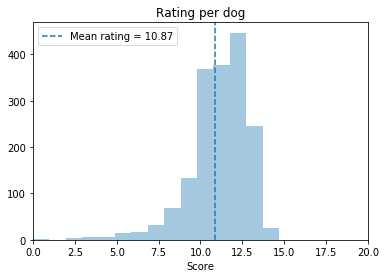

count    1745.000000
mean       10.874276
std         1.868840
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        34.285714
Name: rating_per_dog, dtype: float64

In [132]:
# ratings histogram
sns.distplot(master_df['rating_per_dog'], bins=35, kde=False)
plt.xlim(0, 20)
plt.axvline(x=master_df['rating_per_dog'].mean(), linestyle = 'dashed', label = 'Mean rating = 10.87')
plt.title('Rating per dog')
plt.xlabel('Score')
plt.legend(loc = 2)
#plt.savefig('RatingHist.jpeg')
plt.show()

master_df['rating_per_dog'].describe()

In [133]:
# sort by highest numerators
print(master_df.sort_values(by='rating_per_dog', ascending=False)['rating_per_dog'][0:10])

master_df.loc[[366]]

366    34.285714
305    14.000000
142    14.000000
34     14.000000
136    14.000000
135    14.000000
47     14.000000
382    14.000000
235    14.000000
59     14.000000
Name: rating_per_dog, dtype: float64


,tweet_id,timestamp,name,stage,text,rating_numerator,rating_denominator,favorite_count,retweet_count,dog_breed,conf_score,expanded_urls,den_per_dog,rating_per_dog
366,810984652412424192,2016-12-19 23:06:23,Sam,None,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0,5754,1591,Golden Retriever,0.871342,"https://www.gofundme.com/sams-smile,https://tw...",0.7,34.285714


We can see that the ratings per dog column we created did a pretty good job of aggregating the most frequent scores and leads to an arguable normal distribution.  We have an outlier at row 366, where the rating numerator is 24.0. We check the text and find that there actually is no score and the 24 came from the text describing "She smiles 24/7". 
Thus, we can remove this rating and recaluclate. 

In [134]:
# drop row 366
merge_df = merge_df.drop(merge_df.index[366])

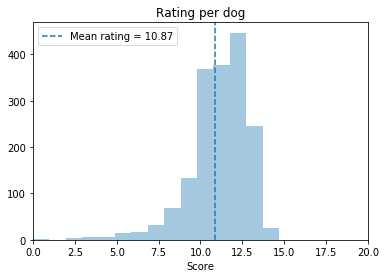

count    1745.000000
mean       10.874276
std         1.868840
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        34.285714
Name: rating_per_dog, dtype: float64

In [135]:
# ratings histogram
sns.distplot(master_df['rating_per_dog'], bins=35, kde=False)
plt.xlim(0, 20)
plt.axvline(x=master_df['rating_per_dog'].mean(), linestyle = 'dashed', label = 'Mean rating = 10.87')
plt.title('Rating per dog')
plt.xlabel('Score')
plt.legend(loc = 2)
#plt.savefig('RatingHist.jpeg')
plt.show()

master_df['rating_per_dog'].describe()

Here is our new histogram without the with row 366 ommitted. 

### b) Dog stages analysis

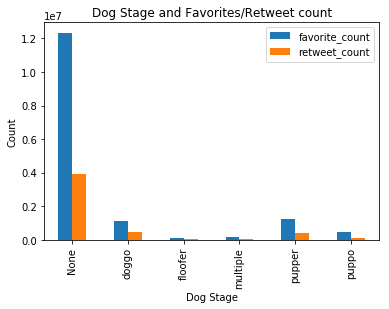

,favorite_count,retweet_count
stage,,
None,12331741,3949960
doggo,1108079,442764
floofer,89656,33275
multiple,168142,75851
pupper,1242913,424264
puppo,461207,137512


In [136]:
# number of favorites and retweets per dog_stage
master_df.groupby('stage')[['favorite_count', 'retweet_count']].sum().plot(kind='bar')
plt.title('Dog Stage and Favorites/Retweet count')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.show()

master_df.groupby('stage')[['favorite_count', 'retweet_count']].sum()

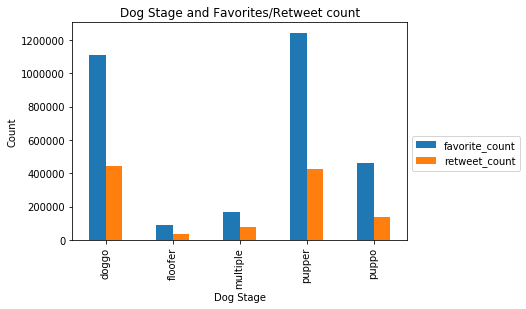

,favorite_count,retweet_count
stage,,
doggo,1108079,442764
floofer,89656,33275
multiple,168142,75851
pupper,1242913,424264
puppo,461207,137512


In [137]:
# we can remove the "None" just to focus on the entries which contain a dog_state
stage_df = master_df[master_df['stage'] != 'None']
stage_df.groupby('stage')[['favorite_count', 'retweet_count']].sum().plot(kind='bar')
plt.title('Dog Stage and Favorites/Retweet count')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.legend(loc=0, bbox_to_anchor=(1, 0.5))
#plt.savefig('DogStage.jpeg')
plt.show()

stage_df.groupby('stage')[['favorite_count', 'retweet_count']].sum()

When we remove rows where dog stage was not entered, we see that "pupper", or puppies seem to be favorited more than anyother dog stage. However, we must consider that they are also the highest posted of all stages. 

In [138]:
master_df.groupby('stage').sum()

,rating_numerator,rating_denominator,favorite_count,retweet_count,conf_score,den_per_dog,rating_per_dog
stage,,,,,,,
None,16913.51,15651.0,12331741,3949960,802.635298,1565.1,15932.341169
doggo,683.00,570.0,1108079,442764,29.429050,57.0,683.000000
floofer,84.00,70.0,89656,33275,4.264427,7.0,84.000000
multiple,137.00,120.0,168142,75851,8.989190,12.0,137.000000
pupper,1876.27,1720.0,1242913,424264,99.233054,172.0,1876.270000
puppo,263.00,220.0,461207,137512,13.949980,22.0,263.000000


###  c) Dog breed  analysis

Retrievers, both golden and labroder make up the top 2 dog breeds being posted. 

In [139]:
# Golden and Labroder retrievers take up the top 2 dogs being posted
master_df['dog_breed'].value_counts()[0:10]

Golden Retriever      173
Labrador Retriever    113
Pembroke               95
Chihuahua              93
Pug                    65
Toy Poodle             52
Chow                   51
Samoyed                46
Pomeranian             42
Malamute               34
Name: dog_breed, dtype: int64

In [140]:
top10_df = master_df.groupby('dog_breed').filter(lambda x: len(x) >= 34)

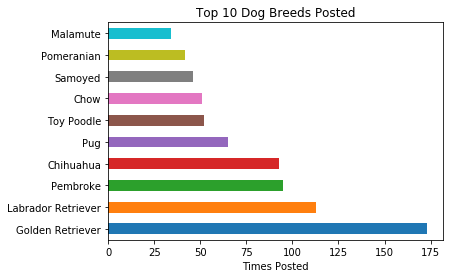

In [141]:
# plot
top10_df['dog_breed'].value_counts().plot(kind='barh')
plt.title('Top 10 Dog Breeds Posted')
plt.xlabel('Times Posted')
#plt.savefig('Top10 Dog Breeds Posted.jpeg')
plt.show()